This notebook allows for live plotting of data from the PiDAQ

## Plot Setup
This is required for animated Matplotlib plots to function within Jupyter. The ipympl module must installed to the PiDAQ before use. 

In [2]:
%matplotlib widget

## Import Required Modules

In [3]:
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pydaqhat as py

## Plot
This cell initialises a blank plot for live plotting.

Text(0.5, 1.0, 'PiDAQ Live Data')

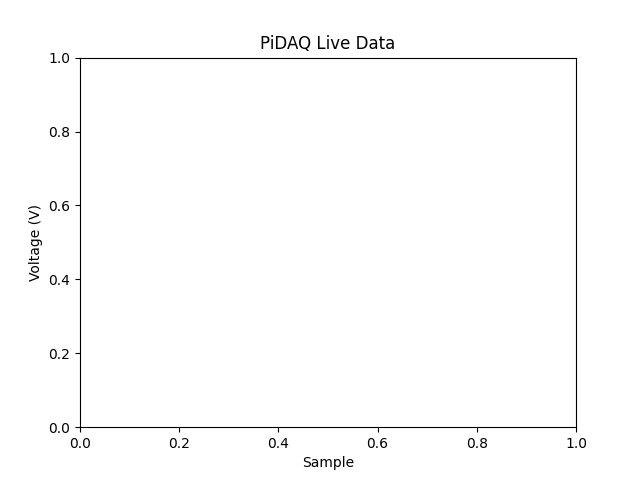

In [9]:
plt.rcParams['animation.html'] = 'jshtml'
plt.style.use('default')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel("Voltage (V)")
ax.set_xlabel("Sample")
ax.set_title("PiDAQ Live Data")
#fig.show()

## Start live plot

This cell reads data live from the PiDAQ and plots it to the graph above. Click the stop button in Jupyter to stop plotting. If you want plotting to resume, run the initialisation cell above before this one. 

In [10]:
 def plot_continous(hat):
    print("Plotting")
    
    
    sample_count = 0
    while True:
        new = hat.a_in_scan_read(-1,0).data[-500:]
        
        ax.cla()
        ax.plot(range(sample_count, sample_count + len(new)), new)
        ax.set_xlim(left=sample_count, right=sample_count + len(new))
        ax.xaxis.set_major_formatter(ticker.EngFormatter())
        ax.set_ylabel("Voltage (V)")
        ax.set_xlabel("Sample")
        ax.set_title("PiDAQ Live Data")
        sample_count += len(new)
        fig.canvas.draw()        
        #sleep(0.1)
    
hat = py.continous_scan_start(
    channels = [0], # Channels to use
    iepe_enable = False, # IEPE enable/disable
    sensitivity = 1000, # Sensitivity in mV/unit
    sample_rate = 20480, # Number of samples per second
    buffer_size = 1000 # Number of samples to keep in buffer before overwriting  
)

plot_continous(hat)

Found a board at address: 0
Recording will start with parameters
                Channels: [0]
                IEPE: False
                Requested Scan Rate: 20480 Hz
                Actual Scan Rate: 17066.667 Hz
                Samples Per Channel: 1000
                Sensitivity: 1000 mV/unit
                Option Flags: CONTINUOUS
                
Starting scan...
Plotting


HatError: Addr 0: Incorrect response -6.

# Stop continous scan
Run this once finished with this notebook to clean up the PiDAQs internal buffer.

In [8]:
hat.a_in_scan_stop()
hat.a_in_scan_cleanup()
        
print("Scan has stopped")

Scan has stopped
